In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import TweedieRegressor
from math import sqrt


from env import get_connection
import wrangle_zillow
import prepare
from regprepare import get_auto_mpg, train_val_test

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = get_auto_mpg()

In [3]:
df.head()

,mpg,cylinders,displ,horsepower,weight,acc,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [4]:
train, val, test = train_val_test(df)
train.shape, val.shape, test.shape

((235, 9), (78, 9), (79, 9))

In [5]:
mms = MinMaxScaler()
# This reassigns the scaled versions into the dataframe by replacing the old numbers
train[['displ', 'horsepower', 'weight', 'acc']] = mms.fit_transform(train[['displ', 'horsepower', 'weight', 'acc']])

train.head()

,mpg,cylinders,displ,horsepower,weight,acc,model_year,origin,name
212,16.5,8,0.727273,0.725275,0.784519,0.244048,76,1,"""cadillac seville"""
346,32.3,4,0.070130,0.104396,0.128154,0.583333,81,3,"""subaru"""
325,44.3,4,0.051948,0.000000,0.133825,0.815476,80,2,"""vw rabbit c (diesel)"""
90,12.0,8,0.932468,0.824176,0.946697,0.208333,73,1,"""mercury marquis brougham"""
246,32.8,4,0.020779,0.021978,0.105472,0.678571,78,3,"""mazda glc deluxe"""


#### Select K Best uses a statisitcal test to find to best "predicting" power features that will best find the target variable

In [6]:
X_train_scaled = train[['displ', 'horsepower', 'weight', 'acc']]
y_train = train['mpg']

In [7]:
f_selector = SelectKBest(f_regression, k = 2)

f_selector.fit(X_train_scaled, y_train)

SelectKBest(k=2, score_func=<function f_regression at 0x1389e1af0>)

In [8]:
f_select_mask = f_selector.get_support()

In [9]:
X_train_scaled.columns[f_select_mask]

Index(['displ', 'weight'], dtype='object')

In [10]:
X_train_scaled.iloc[:,f_select_mask]

,displ,weight
212,0.727273,0.784519
346,0.070130,0.128154
325,0.051948,0.133825
90,0.932468,0.946697
246,0.020779,0.105472
...,...,...
72,0.607792,0.646158
107,0.420779,0.333428
272,0.210390,0.352141
352,0.072727,0.217465


In [11]:
f_selector.transform(X_train_scaled)

array([[0.72727273, 0.78451942],
       [0.07012987, 0.12815424],
       [0.05194805, 0.13382478],
       [0.93246753, 0.94669691],
       [0.02077922, 0.10547207],
       [0.12987013, 0.24836972],
       [0.6025974 , 0.45137511],
       [0.64415584, 0.74397505],
       [0.85714286, 0.79642756],
       [0.72727273, 0.58151403],
       [0.4025974 , 0.42755883],
       [0.03376623, 0.11057556],
       [0.18441558, 0.4471222 ],
       [0.46753247, 0.47207258],
       [0.46753247, 0.54068614],
       [0.72727273, 0.80606748],
       [0.13246753, 0.17607031],
       [0.72727273, 0.73603629],
       [0.05194805, 0.14516586],
       [0.22337662, 0.33853133],
       [0.72727273, 0.81910972],
       [0.16883117, 0.24865325],
       [0.16883117, 0.25857669],
       [0.4025974 , 0.50127587],
       [0.21038961, 0.30195634],
       [0.21038961, 0.3790757 ],
       [0.42077922, 0.36518287],
       [0.11948052, 0.17947264],
       [0.72727273, 0.7235611 ],
       [0.72727273, 0.67337681],
       [0.

In [12]:
X_train = train.drop(columns = ['mpg', 'model_year', 'name'])
X_train.head()

,cylinders,displ,horsepower,weight,acc,origin
212,8,0.727273,0.725275,0.784519,0.244048,1
346,4,0.070130,0.104396,0.128154,0.583333,3
325,4,0.051948,0.000000,0.133825,0.815476,2
90,8,0.932468,0.824176,0.946697,0.208333,1
246,4,0.020779,0.021978,0.105472,0.678571,3


In [13]:
X_train = pd.get_dummies(X_train, columns = ['cylinders', 'origin'])

In [14]:
X_train.head()

,displ,horsepower,weight,acc,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3
212,0.727273,0.725275,0.784519,0.244048,0,0,0,0,1,1,0,0
346,0.070130,0.104396,0.128154,0.583333,0,1,0,0,0,0,0,1
325,0.051948,0.000000,0.133825,0.815476,0,1,0,0,0,0,1,0
90,0.932468,0.824176,0.946697,0.208333,0,0,0,0,1,1,0,0
246,0.020779,0.021978,0.105472,0.678571,0,1,0,0,0,0,0,1


In [15]:
lm = LinearRegression()

rfe = RFE(lm, n_features_to_select = 7)

In [16]:
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=7)

In [17]:
rfe.ranking_

ranks = rfe.ranking_
columns = X_train.columns.tolist()

feature_ranks = pd.DataFrame({'ranking': ranks,
             'feature': columns})

In [18]:
feature_ranks.sort_values('ranking')[feature_ranks.ranking == 1]

,ranking,feature
0,1,displ
1,1,horsepower
2,1,weight
4,1,cylinders_3
5,1,cylinders_4
6,1,cylinders_5
11,1,origin_3


# OLS (Linear regression)

In [20]:
val[['displ', 'horsepower', 'weight', 'acc']] = mms.transform(val[['displ', 'horsepower', 'weight', 'acc']])

X_val = val.drop(columns = ['mpg', 'model_year', 'name'])

X_val = pd.get_dummies(X_val, columns = ['cylinders', 'origin'])

y_val = val['mpg']

In [25]:
X_train.drop(columns = 'cylinders_5', inplace = True)

In [27]:
lm = LinearRegression()

In [28]:
lm.fit(X_train, y_train)

LinearRegression()

In [30]:
y_train.head()

212    16.5
346    32.3
325    44.3
90     12.0
246    32.8
Name: mpg, dtype: float64

In [31]:
lm_preds = lm.predict(X_train)

In [34]:
preds_df = pd.DataFrame({'actual': y_train,
                         'lm_preds': lm_preds})

In [136]:
lm_rmse = sqrt(mean_squared_error(preds_df['lm_preds'], preds_df['actual']))
lm_rmse
# This means that the linear regression model is missing the actual by this amount on average

3.744575765652876

# LASSO + LARS

In [65]:
lasso = LassoLars(alpha = 0.05)

In [66]:
lasso.fit(X_train, y_train)

lasso_preds = lasso.predict(X_train)

In [67]:
preds_df['lasso_preds'] = lasso_preds
preds_df.head()

,actual,lm_preds,lasso_preds
212,16.5,12.008899,13.344142
346,32.3,33.327807,31.104773
325,44.3,31.963603,31.277887
90,12.0,8.817639,10.520505
246,32.8,34.716194,32.172975


In [68]:
lasso_rmse = sqrt(mean_squared_error(preds_df['actual'], preds_df['lasso_preds']))
lasso_rmse

3.9767066566241396

# Polynomial regression

In [102]:
pf = PolynomialFeatures(degree = 2)

pf.fit(X_train, y_train)

PolynomialFeatures()

In [103]:
X_polynomial = pf.transform(X_train)

In [104]:
lmtwo = LinearRegression()

lmtwo.fit(X_polynomial, y_train)

LinearRegression()

In [105]:
preds_df['poly_preds'] = lmtwo.predict(X_polynomial)
preds_df.head()

,actual,lm_preds,lasso_preds,poly_preds
212,16.5,12.008899,13.344142,17.1250
346,32.3,33.327807,31.104773,32.6250
325,44.3,31.963603,31.277887,36.1250
90,12.0,8.817639,10.520505,8.9375
246,32.8,34.716194,32.172975,40.6250


In [106]:
poly_rmse = sqrt(mean_squared_error(preds_df['actual'], preds_df['poly_preds']))
poly_rmse

5.837485306829201

In [111]:
lassotwo = LassoLars(alpha = 0.1)
lassotwo.fit(X_polynomial, y_train)

LassoLars(alpha=0.1)

In [116]:
preds_df['lasso_poly'] = lassotwo.predict(X_polynomial)
preds_df.head()

,actual,lm_preds,lasso_preds,poly_preds,lasso_poly
212,16.5,12.008899,13.344142,17.1250,14.808871
346,32.3,33.327807,31.104773,32.6250,29.745845
325,44.3,31.963603,31.277887,36.1250,31.196280
90,12.0,8.817639,10.520505,8.9375,12.503780
246,32.8,34.716194,32.172975,40.6250,31.103780


In [117]:
lassopoly_rmse = sqrt(mean_squared_error(preds_df['actual'], preds_df['lasso_poly']))
lassopoly_rmse

4.2027306640299456

# Generalized Linear Model

(array([ 9., 48., 44., 33., 28., 29., 23., 14.,  2.,  5.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <BarContainer object of 10 artists>)

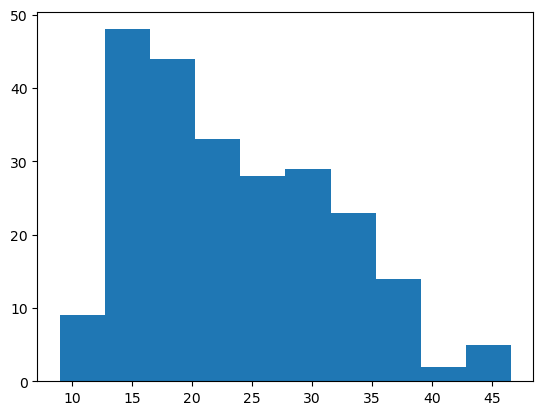

In [119]:
plt.hist(y_train)

In [127]:
tweedie = TweedieRegressor(power = 0)

tweedie.fit(X_train, y_train)

preds_df['tweedie'] = tweedie.predict(X_train)
preds_df.head()

TweedieRegressor(power=0)

In [132]:
tweedie_norm = sqrt(mean_squared_error(preds_df['actual'], preds_df['tweedie']))
tweedie_norm

5.9264707758233515

In [130]:
tweedie2 = TweedieRegressor(power = 1)

tweedie2.fit(X_train, y_train)

preds_df['tweedie2'] = tweedie2.predict(X_train)
preds_df.head()

,actual,lm_preds,lasso_preds,poly_preds,lasso_poly,tweedie,tweedie2
212,16.5,12.008899,13.344142,17.1250,14.808871,19.790974,14.753256
346,32.3,33.327807,31.104773,32.6250,29.745845,27.220785,32.368355
325,44.3,31.963603,31.277887,36.1250,31.196280,26.852609,31.182495
90,12.0,8.817639,10.520505,8.9375,12.503780,19.299961,13.588848
246,32.8,34.716194,32.172975,40.6250,31.103780,27.407288,33.435556


In [134]:
tweedie_poisson = sqrt(mean_squared_error(preds_df['actual'], preds_df['tweedie2']))
tweedie_poisson

4.049857590714997

In [137]:
pd.DataFrame({'model': ['linear', 'lasso', 'linear_poly', 'lasso_poly', 'tweedie_norm', 'tweedie_poisson'],
             'rmse': [lm_rmse, lasso_rmse, poly_rmse, lassopoly_rmse, tweedie_norm, tweedie_poisson]})

,model,rmse
0,linear,3.744576
1,lasso,3.976707
2,linear_poly,5.837485
3,lasso_poly,4.202731
4,tweedie_norm,5.926471
5,tweedie_poisson,4.049858


In [144]:
preds_df['baseline'] = y_train.mean()
preds_df.head()

,actual,lm_preds,lasso_preds,poly_preds,lasso_poly,tweedie,tweedie2,baseline
212,16.5,12.008899,13.344142,17.1250,14.808871,19.790974,14.753256,23.50383
346,32.3,33.327807,31.104773,32.6250,29.745845,27.220785,32.368355,23.50383
325,44.3,31.963603,31.277887,36.1250,31.196280,26.852609,31.182495,23.50383
90,12.0,8.817639,10.520505,8.9375,12.503780,19.299961,13.588848,23.50383
246,32.8,34.716194,32.172975,40.6250,31.103780,27.407288,33.435556,23.50383


In [141]:
sqrt(mean_squared_error(preds_df['actual'], preds_df['baseline']))

8.092675963815624